In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

In [7]:
import os
import os

directory = "CTU-IoT-Malware"
files = [os.path.join(directory, file) for file in os.listdir(directory)]
print(files)

['CTU-IoT-Malware/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv', 'CTU-IoT-Malware/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv']


In [9]:
f1 = files[0]

df1 = pd.read_csv(f1,sep="|")
print(f1)
print(df1)


CTU-IoT-Malware/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv
                   ts                 uid        id.orig_h  id.orig_p  \
0        1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103    51524.0   
1        1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103    56305.0   
2        1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103    41101.0   
3        1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
4        1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   
...               ...                 ...              ...        ...   
1008743  1.526283e+09   CUyBg1WA04SBmf3ah  192.168.100.103    43763.0   
1008744  1.526283e+09  CvaIoX2b9VynuYieBf  192.168.100.103    43763.0   
1008745  1.526283e+09   CVHrUzIUN0mW5lQsl  192.168.100.103    43763.0   
1008746  1.526283e+09  CkGlnL2pxzlusrFlLj  192.168.100.103    43763.0   
1008747  1.526283e+09  CoOjVZ1zw3pWf7a9n5  192.168.100.103    43763.0   

               id.resp_h  id.resp_p proto service  duration

In [10]:
print(df1["ts"].max() - df1["ts"].min())
print(df1.describe())
print(df1["label"].unique())
print(df1["detailed-label"].unique())
print(df1["history"].unique())
print(len(df1["history"].unique()))
print(len(df1["uid"].unique()), len(df1))
print(df1["duration"].mode())
print(df1.columns)

402852.0154390335
                 ts     id.orig_p     id.resp_p  missed_bytes     orig_pkts  \
count  1.008748e+06  1.008748e+06  1.008748e+06     1008748.0  1.008748e+06   
mean   1.526075e+09  4.443684e+04  1.609771e+04           0.0  1.496242e+00   
std    1.157431e+05  9.660592e+03  1.956280e+04           0.0  1.741176e+00   
min    1.525880e+09  3.000000e+00  0.000000e+00           0.0  0.000000e+00   
25%    1.525975e+09  4.373000e+04  2.300000e+01           0.0  1.000000e+00   
50%    1.526071e+09  4.376300e+04  8.080000e+03           0.0  1.000000e+00   
75%    1.526174e+09  4.881400e+04  2.818025e+04           0.0  1.000000e+00   
max    1.526283e+09  6.539400e+04  6.553500e+04           0.0  6.000000e+01   

       orig_ip_bytes     resp_pkts  resp_ip_bytes  
count   1.008748e+06  1.008748e+06   1.008748e+06  
mean    8.114562e+01  1.424647e-01   9.049184e+00  
std     9.473090e+01  1.850414e+00   1.196776e+02  
min     0.000000e+00  0.000000e+00   0.000000e+00  
25%     4.

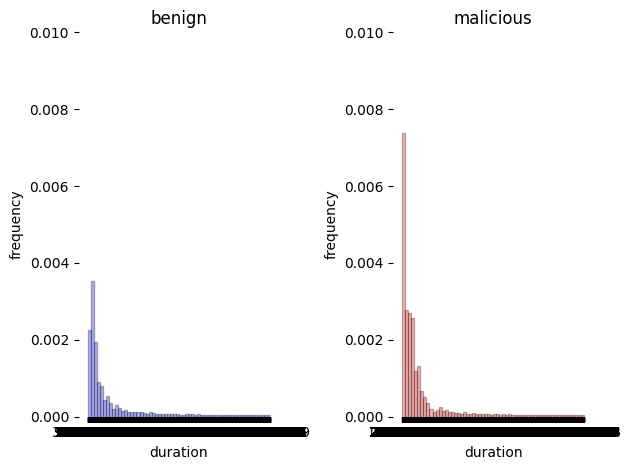

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

# Assuming df1 is your DataFrame and 'duration' is the column of interest.
df = df1.sample(frac=0.00001)

for column in df.columns:
    numeric_duration_m = df["duration"] != "-"
    benign_m = df["label"] == "Benign"
    benign = df[numeric_duration_m & benign_m]["duration"]
    malicious = df[numeric_duration_m & ~benign_m]["duration"][0: len(benign)]

    def histit(n, column):
        c = "blue" if n == 1 else "red"
        plt.subplot(1,2,n)
        plt.hist(column, bins=60, alpha=0.3, color=c, edgecolor=(0,0,0,0),density=True)
        plt.title("benign" if n ==1 else "malicious")
        plt.xlabel('duration')
        plt.ylabel('frequency')
        ax = plt.gca()
        ax.set_ylim([0,0.01])
        plt.draw()


    histit(1,benign)
    histit(2,malicious)
    plt.tight_layout()
    # Show the plot
    plt.show()


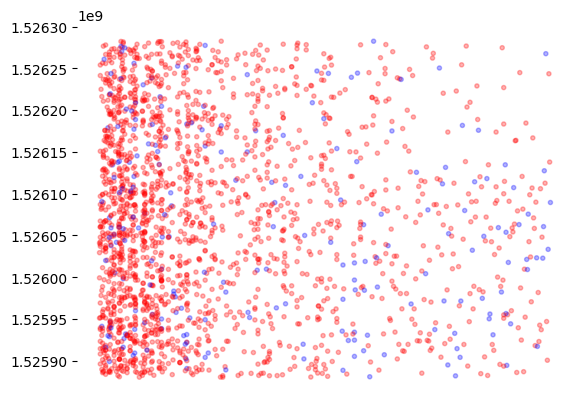

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

# Assuming df1 is your DataFrame and 'duration' is the column of interest.
df = df1.sample(frac=1)
numeric_duration_m = df["duration"] != "-"
df = df[numeric_duration_m]
df = df.sample(frac=0.01)

def l2c(l):
    return {
        "Malicious": "red",
        "Benign": "blue",
    }[l]

def l2y(l):
    return {
        "Malicious": 1,
        "Benign": -1,
    }[l]

plt.figure()
plt.xticks([])
plt.scatter(df["duration"],df["ts"],c=df["label"].apply(l2c),marker='.',alpha=0.3)

In [13]:
# count unique src_ips
print(df1.columns)
orig = df1["id.orig_h"].unique()
resp = df1["id.resp_h"].unique()
print("len id.orig_h", len(orig))
print("len id.resp_h", len(resp))

print(len(list(set(orig).intersection(set(resp)))))
df1["id.resp_h"]

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')
len id.orig_h 15004
len id.resp_h 597107
9278


0           65.127.233.163
1            63.150.16.171
2             111.40.23.49
3          131.174.215.147
4              91.42.47.63
                ...       
1008743      16.219.83.137
1008744     100.57.245.196
1008745       249.99.119.9
1008746    205.103.167.192
1008747      23.70.168.160
Name: id.resp_h, Length: 1008748, dtype: object

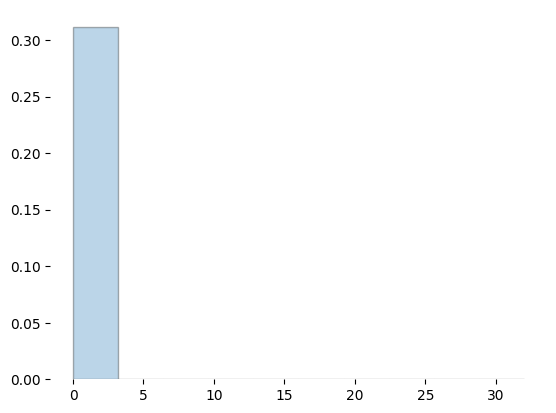

In [24]:
df = df1.sample(frac=0.001)
column = "resp_pkts"
numeric_m = df[column] != "-"
c = df[numeric_m][column]
print(c)
plt.hist(c, bins=10, alpha=0.3, edgecolor=(0,0,0,0),density=True)
plt.show()